<a href="https://colab.research.google.com/github/MoronSlayer/Deep-Learning-Projects/blob/learner/Ritesh_HW3_695.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "HW-3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. 


In [4]:
data = pd.read_csv('Titanic.csv')
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## If some features are missing, fill them in using the average of the same feature of other samples.

In [5]:
data_clean = data.fillna(data.mean())
data_clean.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"


In [6]:
model_data = data_clean[['pclass', 'sex', 'age','sibsp','survived']]

In [7]:
model_data['pclass'] = model_data['pclass'].map({'1st':1,'2nd':2,'3rd':3})
model_data['sex'] = model_data['sex'].map({'male':0,'female':1})
model_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


## Take a random 80% samples for training and the rest 20% for test.

# Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree

In [8]:
X = model_data.drop('survived',axis=1)
y = model_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state = 42)

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "decision_tree.dot"),  
        feature_names=['pclass', 'sex', 'age','sibsp'],
        rounded=True,
        filled=True
    )

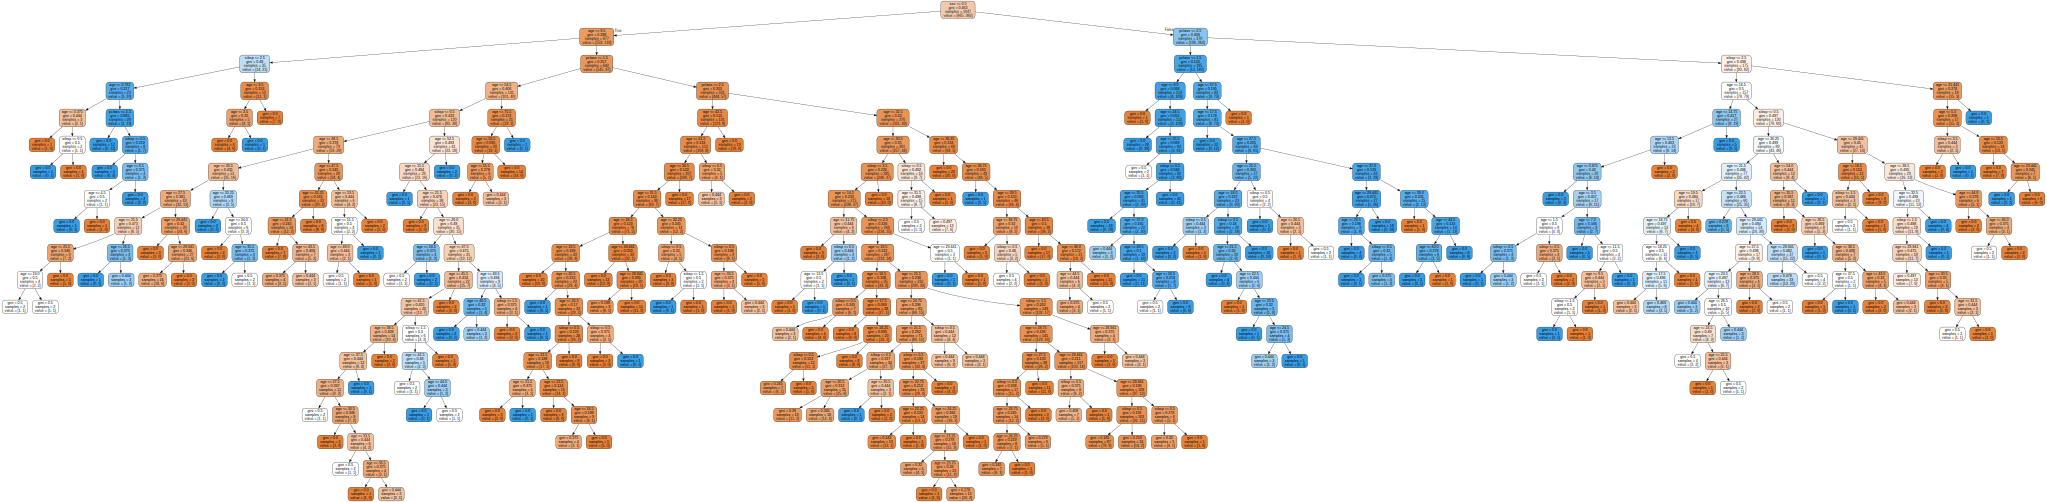

In [11]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "decision_tree.dot")  

In [12]:
y_pred = tree_clf.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

Classification Report: 

               precision    recall  f1-score   support

           0       0.72      0.89      0.80       144
           1       0.81      0.58      0.68       118

    accuracy                           0.75       262
   macro avg       0.77      0.74      0.74       262
weighted avg       0.76      0.75      0.74       262

Accuracy:  0.7519083969465649
percent survivors correctly predicted (on testing set) : 58.47%

percent fatalities correctly predicted (on testing set) : 88.89%



As wee see, without specifying any parameters for the decision tree classifier, we get a huge and complex tree structure.







# Step 3,4: Using GridSearchCV to find the best estimators, plotting the pruned tree and reporting accuracy 

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [15]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=42)

We have found the best estimators to be having the above parameters. Plotting decision tree with the best estimators.

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       144
           1       0.81      0.67      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.79      0.78      0.78       262

percent survivors correctly predicted (on test set) for pruned tree : 66.95%

percent fatalities correctly predicted (on test set) for pruned tree : 87.50%



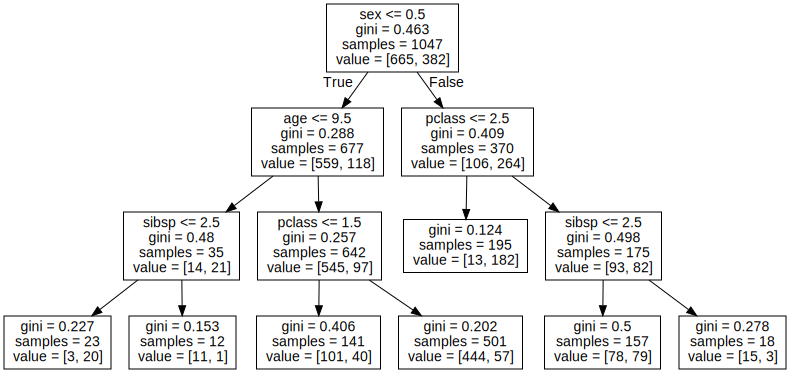

In [26]:
clf = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=7,random_state = 42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on test set) for pruned tree : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on test set) for pruned tree : {0:.2f}%\n".format(specificity_test*100))

data = export_graphviz(
                clf, 
                out_file=str(IMAGES_PATH / "decision_tree_grid_search.dot"),
                feature_names=X_train.columns)
from graphviz import Source

Source.from_file(IMAGES_PATH / "decision_tree_grid_search.dot")  

# Step 4: reporting accuracy on the test set

In [23]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(specificity_test*100))

Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.88      0.82       144
           1       0.81      0.67      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.79      0.78      0.78       262

Accuracy:  0.7824427480916031
percent survivors correctly predicted (on test set) : 66.95%

percent fatalities correctly predicted (on test set) : 87.50%



We can see the improvement in the prediction of survivors 


# Step 5 : Random classifier with n_estimarors 50 and max leaf nodes 7 ( from step 3) 

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes = 7,  random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

y_true, y_pred = y_test, rnd_clf.predict(X_test)

print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on test set) using random forest : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on test set) using random forest : {0:.2f}%\n".format(specificity_test*100))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       144
           1       0.89      0.49      0.63       118

    accuracy                           0.74       262
   macro avg       0.79      0.72      0.72       262
weighted avg       0.78      0.74      0.73       262

percent survivors correctly predicted (on test set) using random forest : 49.15%

percent fatalities correctly predicted (on test set) using random forest : 95.14%



## we see that the pruned decision tree is better than the random forest at predicting survivors

# Extra - introspections


In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)

y_true, y_pred = y_test, ada_clf.predict(X_test)

print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262

percent survivors correctly predicted (on testing set) : 64.41%

percent fatalities correctly predicted (on testing set) : 87.50%



In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

print("score:",stacking_clf.score(X_test, y_test))

y_pred_stack = stacking_clf.predict(X_test)

y_true, y_pred = y_test, stacking_clf.predict(X_test)

print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))


score: 0.7595419847328244
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       144
           1       0.87      0.55      0.67       118

    accuracy                           0.76       262
   macro avg       0.79      0.74      0.74       262
weighted avg       0.78      0.76      0.75       262

percent survivors correctly predicted (on testing set) : 55.08%

percent fatalities correctly predicted (on testing set) : 93.06%

